D-DvR <type 'yahmm.yahmm.Model'>


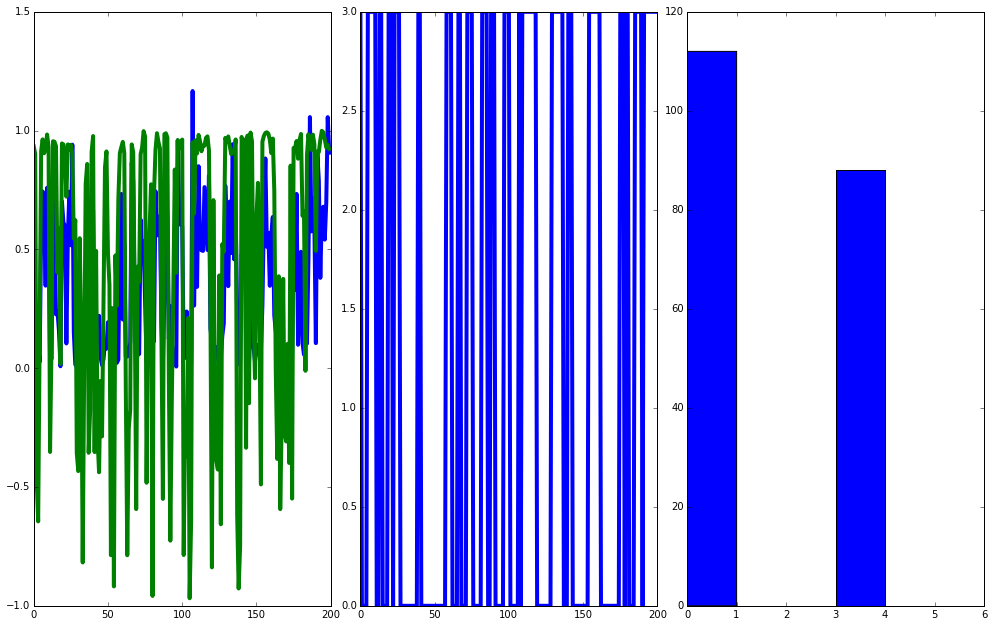

In [1]:
from yahmm import *
import random
import math

def one_particle_n_states(ListState0,transition_mat=[],StateN={},selfprob=0.033):
  

    model = Model( name="Unknown" )
    
    pre=0.0001
    Ra0 = State(NormalDistribution(StateN["Ra0"], pre), name="Ra0")
    Ra1 = State(NormalDistribution(StateN["Ra1"], pre), name="Ra1")   
    Le0 = State(NormalDistribution(StateN["Le0"], pre), name="Le0")
    #Le1 = State(NormalDistribution(StateN["Le1"], pre), name="Le1")
    Ri0 = State(NormalDistribution(StateN["Ri0"], pre), name="Ri0")
    #Ri1 = State(NormalDistribution(StateN["Ri1"], pre), name="Ri1")
    
    ListStatet=[Ra0,Ra1,Le0,Ri0]#,Ri1,Le1]
    ListState = []
    for i in ListState0:
        ListState.append(ListStatet[i])
        
    #print [l.name for l in ListState]
    for state in ListState:
        model.add_state(state)
       
    endp=0.0001
    for state0 in ListState:
        for state1 in ListState:
            if state1.name == state0.name:
                s0=0.166
                s0=selfprob
                model.add_transition(state0, state1,s0)
            else:
                model.add_transition(state0,state1, (1-s0-endp)/(len(ListState)-1) )

   
    for state in ListState:

        model.add_transition(model.start,state, 1.0/len(ListState))
        model.add_transition(state,model.end, endp)
   

    model.bake()
    
    return model



def generate_traj(time,step=1,sigma=0.2,nstate=3):
    
    
    #nstate = np.random.randint(1,6)
    #nstate=6
    #ListState = range(6)
    #np.random.shuffle(ListState)
    #ListState = ListState[:nstate]
    
    
    
    #0 1 = random
    #2 3 = Left
    #4 5 = Right
    
    #if 1 in ListState and not 0 in ListState:
    #    ListState[ListState.index(1)] = 0
    #if 3 in ListState and not 2 in ListState:
    #    ListState[ListState.index(3)] = 2
    #if 5 in ListState and not 4 in ListState:
    #    ListState[ListState.index(5)] = 4
    
    StateN = {"Ra0": 0,"Ra1":1,"Le0":2,"Ri0":3,"end":4}
    iStateN = {v:k for k,v in StateN.items()}
    
    Model_type = {"D-D":[0,["Ra0","Ra1"]],"D-DvL":[1,["Ra0","Le0"]],"D-DvR":[2,["Ra0","Ri0"]],
                 "D-DvL-DvR":[3,["Ra0","Le0","Ri0"]],"D-D-DvL":[4,["Ra0","Ra1","Le0"]],
                 "D-D-DvR":[5,["Ra0","Ra1","Ri0"]],"D-D-DvR-DvL":[6,["Ra0","Ra1","Le0","Ri0"]]}
    #print ListState
    Model_num =  np.random.randint(0,7)
    ModelN = Model_type.keys()
    ModelN.sort()
    ModelN = ModelN[Model_num]
    Model_num=Model_type[ModelN][0]
    
    ListState = [StateN[k] for k in Model_type[ModelN][1]]

    
    selfprob = 0.4 + 0.6*random.random()
    model = one_particle_n_states(ListState0=ListState,StateN=StateN,selfprob=selfprob)
    seq = np.zeros(time)
    sequence  = model.sample(time)
    dist_t = np.zeros((time,2))
    
    
    Ra0 = [0,0.15*random.random()]
    Ra1 = [0,max(0.30,random.random())]
    Le0 = [max(0.1,random.random()),0.2]
    #Le0 = [max(1,2*random.random()),0.2]
    #Le1 = [-max(-1.5*Le0[0],random.random()),0.2]
    Ri0 = [max(0.1,random.random()),0.2]
    #Ri0 = [max(1,2*random.random()),0.2]

    #Ri1 = [max(1.5*Ri0[0],random.random()),0.2]
    D ={"Ra0": Ra0,"Ra1":Ra1,"Le0":Le0,"Ri0":Ri0}
    
    #print D
    
    #for tt,(n,s) in enumerate(model.viterbi(sequence)[1][1:-1]):
    for tt,v in enumerate(sequence):
        
        
        seq[tt] = int(round(v,0))
        name = iStateN[seq[tt]]
        
        dist_t[tt][0] = max(1e-6,np.abs(np.random.normal(D[name][0],D[name][1])))
        if name in ["Ra0","Ra1"]:
            dist_t[tt][1] = 2*random.random() - 1
        if name in ["Le0"]:
            dist_t[tt][1] =  - 1 + 0.1*random.random()
        if name in ["Ri0"]:
            dist_t[tt][1] =  1 - 0.1*random.random()
    """
    if 1 in seq and 0 not in seq:
        seq[seq==1] = 0
    if 3 in seq and 2 not in seq:
        seq[seq==3] = 2
    if 5 in seq and 4 not in seq:
        seq[seq==5] = 4"""
    
    #print tt
    #dist =  np.random.normal(seq*step,sigma)
                
    
    return ModelN,Model_num,seq,dist_t

ModelN,Model_num,s,d = generate_traj(200)
print ModelN,Model
f = figure(figsize=(15,10))
ax = f.add_subplot(131)
plot(d[::,0])
plot(d[::,1])
ax = f.add_subplot(132)

plot(s)
ax = f.add_subplot(133)

h = hist(s,range=[0,6],bins=6)


'\n\ntest = X_train[0]\nseq = np.argmax(Y_train[0],axis=-1)\nprint seq\ntraj = plot_traj(test,label=seq,toplot=True)\n#plot(traj[::,0],traj[::,1])\nfigure()\nwtraj,d =traj_to_dist(traj[::,:2])\nplot(wtraj[::,0],wtraj[::,1])\n\nfigure()\nprint d[:10,0],test[:10,0]\nprint d[:10,1],test[:10,1]'

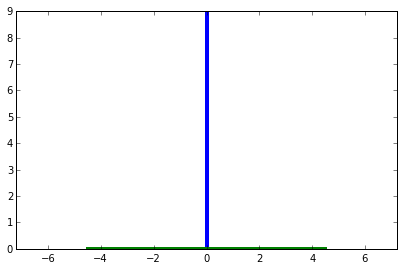

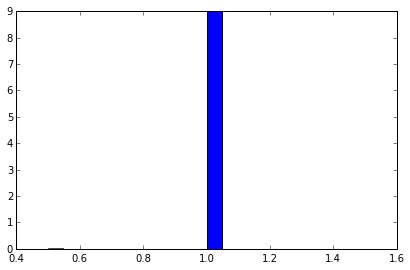

In [2]:
#Draw traj from HMM
#from pylab import plot
from numpy import mean,cov,cumsum,dot,linalg,array,rank

def plot_traj(X,label=[],random_sin=[],toplot=True):
    colors = {0:"b",1:"g",2:"r",3:"k"}
    traj = np.zeros((len(X)+1,3))
    if random_sin == []:
        random_sin=np.random.randint(0,2,len(X)+1)
    for i,(d,t) in enumerate(X):
        traj[i+1][0] = traj[i][0] + d*t
        
        traj[i+1][1] = traj[i][1] + (-1)**random_sin[i]*d*np.sin(np.arccos(t))
        if label != []:
            traj[i+1][2] = label[i]
        if toplot:
            plot(traj[i:i+2,0],traj[i:i+2:,1],color=colors[traj[i+1][2]])
        
    return traj

def traj_to_dist(traj):
    
    #Firts PCA:
    M = (traj-mean(traj.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M)) # attention:not always sorted
    if latent[0] < latent[1]:
        coeffp= np.zeros_like(coeff)
        coeffp[::,0] = coeff[::,1]
        coeffp[::,1] = coeff[::,0]
        coeff = coeffp
    if coeff[0,0] <0:
        coeff = coeff * -1
        
    #print coeff,latent
    score = dot(coeff.T,M) # projection of the data in the new space
    alligned_traj = score.T
    dist = np.sqrt( np.sum((alligned_traj[1:]-alligned_traj[:-1])**2,axis=1))
    #print coeff,latent
    t = (alligned_traj[1:]-alligned_traj[:-1]) / dist[::,newaxis]
    t = t[::,0]
    t[np.isnan(t)] = 0
    
    
    return alligned_traj,np.array([dist,t]).T


#traji =  X_traj_test[50][1][::,:2]
traji = np.array([[0,i] for i in range(10)])

n,d =traj_to_dist(traji)



plot(traji[::,0],traji[::,1])
plot(n[::,0],n[::,1])
axis("equal")
figure()
hist(d[::,1],bins=20)
#plot()
"""

test = X_train[0]
seq = np.argmax(Y_train[0],axis=-1)
print seq
traj = plot_traj(test,label=seq,toplot=True)
#plot(traj[::,0],traj[::,1])
figure()
wtraj,d =traj_to_dist(traj[::,:2])
plot(wtraj[::,0],wtraj[::,1])

figure()
print d[:10,0],test[:10,0]
print d[:10,1],test[:10,1]"""
#plot()


In [16]:
np.random.seed(0)
X_traj = []
X_train = []
Y_train = []
Y_train_cat = []

for i in range(40000):
    if i % 1000 == 0:
        print i
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain = True
    while tryagain:
        try:
            ModelN,Model_num,s,d = generate_traj(200,step=step,sigma=sigma)
            
            real_traj = plot_traj(d,toplot=False)
            alligned_traj,d = traj_to_dist(real_traj[::,:2])
            X_traj.append([d,real_traj,alligned_traj])
            
            tryagain=False
        except IndexError:
            tryagain=True
    X_train.append(d)
    res = np.zeros((200,6))
    res[range(200),np.array(s,dtype=np.int)] = 1
    Y_train.append(res)
    resc = np.zeros((1,7))
    resc[0,Model_num] = 1
    Y_train_cat.append(resc)
print np.sum(np.isnan(X_train))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
0


In [98]:
X_traj_test =[]
X_test = []
Y_test = []
Y_test_cat = []
for i in range(100):
    
    step=2
    sigma=1
    sigma = max(np.random.normal(0.5,1),0.05)
    step = max(np.random.normal(1,1),0.2)
    tryagain =True
    while tryagain:
        try:
            M1,Model_num,s,d = generate_traj(200)#,step=step,sigma=sigma)
            real_traj = plot_traj(d,toplot=False)
            alligned_traj,d = traj_to_dist(real_traj[::,:2])
            X_traj_test.append([d,real_traj,alligned_traj])
            tryagain=False
        except IndexError:
            tryagain=True
   
    X_test.append(d)
    res = np.zeros((200,6))
    res[range(200),np.array(s,dtype=np.int)] = 1
    Y_test.append(res)
    resc = np.zeros((1,7))
    resc[0,Model_num] = 1
    Y_test_cat.append(resc)
    #print np.array(s+1,dtype=np.int)
    #print res

In [30]:
#y_train[0]

In [54]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation , TimeDistributedDense
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

model = Sequential()

model.add(LSTM(output_dim=20, activation='sigmoid', 
               inner_activation='hard_sigmoid',return_sequences=True,input_shape=(None,1)))
model.add(Dropout(0.5))
model.add(TimeDistributedDense(6,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

KeyboardInterrupt: 

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print X_train[::,::,newaxis].shape,Y_train.shape
model.fit(X_train[::,::,newaxis], Y_train, batch_size=120, nb_epoch=200,validation_split=0.05)
#score = model.evaluate(X_test, Y_test, batch_size=16)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
score = model.evaluate(X_test[::,::,newaxis], Y_test, batch_size=16)
print score
pred = model.predict(X_test[::,::,newaxis],  batch_size=16)
#print pred.shape
#print pred[0] # / np.sum(pred[0],axis=1)[::,newaxis]

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [4]:
from keras.models import Graph
from keras.layers.core import Dense, Dropout, Activation,TimeDistributedDense,Merge
from keras.layers.core import Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#from keras.objectives import categorical_crossentropy


def reverse(X):
    return X[::,::,::-1]

def output_shape(input_shape):
    # here input_shape includes the samples dimension
    return input_shape  # shap


def sub_mean(X):
    xdms = X.shape
    return X.reshape(xdms[0])

middle = 50
graph = Graph()
graph.add_input(name='input1', input_shape=(None,2))



graph.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost",input="input1")

graph.add_node(Lambda(reverse, output_shape),input="input1",name="reversed0")

graph.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost1",input="reversed0")


graph.add_node(Lambda(reverse, output_shape),input="allmost1",name="reversed")

graph.add_node(TimeDistributedDense(6,activation="softmax"),inputs=['allmost',"reversed"],
          merge_mode="sum",name="output0")


#graph.load_weights("step_check")
#############################################
#Original end there
#graph.load_weights("step_check")

#graph.add_output(name="category",input="category0")
#graph.compile('adadelta', {'output':'categorical_crossentropy'})

#############################################
graph.add_node(LSTM(output_dim=14, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=False),
                   name="cat0",input="output0")

graph.add_node(Dense(7,activation="softmax"),input="cat0",name="category0")
#graph.add_node(TimeDistributedDense(1,activation="linear"),input='output0',name="output1")


graph.load_weights("/home/jarbona/RNN_mus/step_check_bigger")


graph.add_output(name="category",input="category0")
graph.add_output(name="output",input="output0")


graph.compile('adadelta', {'output':'categorical_crossentropy',
                          'category':'categorical_crossentropy'})


#############################################
#Second end there


#############################################



#history = graph.fit({'input1':X_train[::,1], 'input2':X2_train[::0], 'output':y_train}, nb_epoch=10)
#predictions = graph.predict({'input1':X_test, 'input2':X2_test}) # {'output':...}
#graph.save_weights("step_check",overwrite=True)



In [ ]:
#TRaining of graph 1
X_train = np.array(X_train)#[:10000]
Y_train = np.array(Y_train)#[:10000]
Y_train_cat = np.array(Y_train_cat)#[:10000]
print X_train[::,::].shape,Y_train.shape
for i in range(20):
    graph.fit({"input1":X_train,
               "output":Y_train,
               "category":Y_train_cat[::,0,::]}, batch_size=120, nb_epoch=3,validation_split=0.05)
    graph.save_weights("step_b_%i"%i,overwrite=True)
#score = model.evaluate(X_test, Y_test, batch_size=16)

In [5]:
from keras.models import Graph
from keras.layers.core import Dense, Dropout, Activation,TimeDistributedDense,Merge
from keras.layers.core import Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#from keras.objectives import categorical_crossentropy


def reverse(X):
    return X[::,::,::-1]

def output_shape(input_shape):
    # here input_shape includes the samples dimension
    return input_shape  # shap


def sub_mean(X):
    xdms = X.shape
    return X.reshape(xdms[0])

middle = 30
graph2 = Graph()
graph2.add_input(name='input1', input_shape=(None,2+6+7))



graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost",input="input1")

graph2.add_node(Lambda(reverse, output_shape),input="input1",name="reversed0")

graph2.add_node(LSTM(output_dim=20, activation='sigmoid',
                    inner_activation='hard_sigmoid',return_sequences=True),
                   name="allmost1",input="reversed0")


graph2.add_node(Lambda(reverse, output_shape),input="allmost1",name="reversed")

graph2.add_node(TimeDistributedDense(4,activation="softmax"),inputs=['allmost',"reversed"],
          merge_mode="sum",name="output0")


graph2.add_output(name="output",input="output0")
#graph.compile('adadelta', {'output':'categorical_crossentropy'})


graph2.load_weights("/home/jarbona/RNN_mus/step_b2_2")
graph2.compile('adadelta', {'output':'categorical_crossentropy'})


#############################################
#Second end there


#############################################



#history = graph.fit({'input1':X_train[::,1], 'input2':X2_train[::0], 'output':y_train}, nb_epoch=10)
#predictions = graph.predict({'input1':X_test, 'input2':X2_test}) # {'output':...}
#graph.save_weights("step_check",overwrite=True)



In [ ]:
a = np.zeros((100,200,6))
c = np.array([[1,2],[3,2],[4,3],[5,6]])
#c = np.zeros((10,3))
#print c.shape
#n=10
#print np.tile(c,n).reshape(4,n,2)
#r = np.concatenate((a,c[::,newaxis,::]))
#print r.shape

In [25]:
#First create training set wit graph
X_train = np.array(X_train)#[:10000]
Y_train = np.array(Y_train)#[:10000]
Y_train_cat = np.array(Y_train_cat)#[:10000]

pred0 =graph.predict({"input1":X_train},  batch_size=1000)
pred_RNN = pred0["output"]
pred_RNN_cat = pred0["category"]

X_train2 = np.concatenate((X_train,pred_RNN,np.tile(pred_RNN_cat,200).reshape(X_train.shape[0],200,7)),axis=2)


In [187]:
print X_train2.shape

(40000, 200, 15)


In [34]:
X_train2 = np.array(X_train2)#[:10000]
Y_train = np.array(Y_train)[::,::,:4]#[:10000]
for i in range(20):
    graph2.fit({"input1":X_train2,
               "output":Y_train}, batch_size=120, nb_epoch=3,validation_split=0.05)
    graph2.save_weights("step_b2_%i"%i,overwrite=True)
#score = model.evaluate(X_test, Y_test, batch_size=16)

Train on 38000 samples, validate on 2000 samples
Epoch 1/3
38000/38000 [==============================] - 402s - loss: 0.2590 - val_loss: 0.2562
Epoch 2/3
38000/38000 [==============================] - 398s - loss: 0.2583 - val_loss: 0.2552
Epoch 3/3
38000/38000 [==============================] - 396s - loss: 0.2575 - val_loss: 0.2544
Train on 38000 samples, validate on 2000 samples
Epoch 1/3
38000/38000 [==============================] - 395s - loss: 0.2570 - val_loss: 0.2542
Epoch 2/3
38000/38000 [==============================] - 396s - loss: 0.2563 - val_loss: 0.2553
Epoch 3/3
38000/38000 [==============================] - 404s - loss: 0.2559 - val_loss: 0.2530
Train on 38000 samples, validate on 2000 samples
Epoch 1/3
21840/38000 [================>.............] - ETA: 168s - loss: 0.2571

KeyboardInterrupt: 

In [6]:
def global_process(X,batch_size=100):
    X = np.array(X)
    pred0 =graph.predict({"input1":X},  batch_size=batch_size)
    pred_RNN = pred0["output"]
    pred_RNN_cat = pred0["category"]
    traj_length = X.shape[1]
    X2 = np.concatenate((X,pred_RNN,np.tile(pred_RNN_cat,traj_length).reshape(X.shape[0],
                                                                              traj_length,7)),axis=2)
    pred1 =graph2.predict({"input1":X2},  batch_size=batch_size)
    pred_RNN = pred1["output"]
    return pred_RNN,pred_RNN_cat
    

In [ ]:
print "test"

In [10]:
#graph.save_weights("Allgood")
import cPickle
#with open("test-set.pick","w") as f:
#    cPickle.dump([X_test,Y_test,Y_test_cat,X_traj_test],f)

with open("/home/jarbona/RNN_mus/test-set.pick","r") as f:
    [X_test,Y_test,Y_test_cat,X_traj_test] = cPickle.load(f)

In [11]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test_cat = np.array(Y_test_cat)

"""score = graph.evaluate({"input1":X_test, "output":Y_test,"category":Y_test_cat[::,0,::]}, batch_size=16)
print score
pred0 =graph.predict({"input1":X_test},  batch_size=16)
pred_RNN = pred0["output"]
pred_RNN_cat = pred0["category"]
"""
pred_RNN,pred_RNN_cat = global_process(X_test,batch_size=100)
#print pred[0] # / np.sum(pred[0],axis=1)[::,newaxis]

In [73]:
Delta_SVC = []
Delta_RNN = []
for i in range(0,100,1):
    
    init = np.argmax(Y_test[i],axis=-1)

    proba_RNN = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi_RNN = np.argmax(proba_RNN,axis=-1)
    
    classi=pred[i]
    
    delta_SVC = np.sum(classi != init) 
    delta_RNN =  np.sum(classi_RNN != init) 
    
    Delta_SVC.append(delta_SVC)
    Delta_RNN.append(delta_RNN)
Delta_RNN = np.array(Delta_RNN)
Delta_SVC = np.array(Delta_SVC)
plot(Delta_SVC/2,label="SVM miss = %.1f +- %.1f"%(np.mean(Delta_SVC/2), np.std(Delta_SVC/2)))
plot(Delta_RNN/2,label="RNN miss = %.1f +- %1.f"%(np.mean(Delta_RNN/2), np.std(Delta_RNN/2)))
xlabel("trajectory number")
ylabel("percent of mislabell steps")
ylim(0,100)
legend()
print np.mean(Delta_SVC/2), np.std(Delta_SVC/2)
print np.mean(Delta_RNN/2), np.std(Delta_RNN/2)
cat_RNN = np.argmax(pred_RNN_cat,axis=-1)
print cat_RNN.shape
cat= np.argmax(Y_test_cat[::,0,::],axis=-1)
print cat.shape
print np.sum(cat != cat_RNN)
#figure()

NameError: name 'pred' is not defined

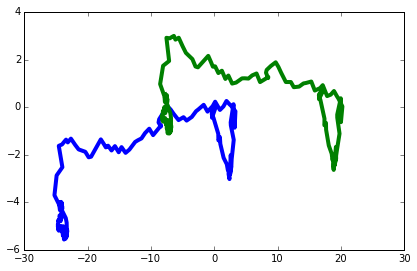

In [35]:
d,ori,fin = X_traj_test[14]
plot(ori[::,0],ori[::,1])
plot(fin[::,0],fin[::,1])

In [1]:
def plot_label(traj,seq):
    colors = {0:"b",1:"g",2:"r",3:"k"}
    #print traj.shape,seq.shape
    init_seq = seq[0]
    i = 0 
    start = 0
    while i < len(traj):
        start = i
        init_seq = seq[i]
        while i < len(traj) and seq[i] == init_seq:
            i += 1
        #print start,i,traj[start:i+1,0]
        #print 
        plot(traj[start:i+1,0],traj[start:i+1,1],color=colors[init_seq])
from scipy.io import loadmat
def get_step_class(fich="/home/jarbona/RNN_mus/res0"):
    Mp = loadmat(fich,squeeze_me=False)
    kPrM=0
    kML_states= 1
    kML_params = 2
    ktrack = 5
    result = Mp["results"][0][0]
    PrM = result[kPrM][0]
    ML_params = result[kML_params][0]
    
    track = result[ktrack][0]
    ML_states = result[kML_states][0]
    
    print len(track),len(ML_states)
    
    labels = ['D','DV','D, D','D, DV','DV, DV','D, D, D','D, D, DV','D, DV, DV','DV, DV, DV']
    
    sigmas = ML_params[0][-1][0]
    emit = ML_params[0][-2]
    #print emit

    
    states = np.array(ML_states,dtype=np.int32)-1
    
    classt= labels[np.argmax(PrM)]
    
    if classt == 'D, D':
        if sigmas[0] > sigmas[1]:
            states = -(states-1)
            
    if classt == 'DV, DV':
        if emit[0][0] > emit[0][1]:
            
            states[states==0] = 3
            states[states==1] = 2

            
        else:
            states[states==0] = 2
            states[states==1] = 3
    
    if classt == 'D, D, DV':
        if sigmas[0] > sigmas[1]:
            states = -(states-1)
        states[states==-1] = 2
        
        if emit[0][2] > 0:
            states[states==2] = 3
        
    if classt == 'D, DV':
        
        if emit[0][1] > 0:
            states[states==1] = 3
        else:
            states[states==1] = 2

            
    if classt == 'D, DV, DV':
        
        if emit[0][1] > emit[0][2]:
            
            states[states==1] = 3
            
        else:
            states[states==2] = 3
            states[states==1] = 2

    
    return PrM,states,labels[np.argmax(PrM)]

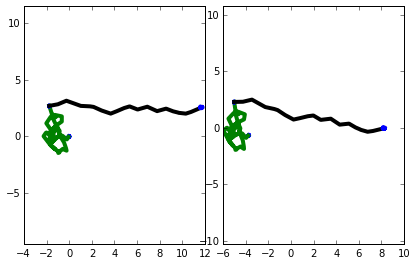

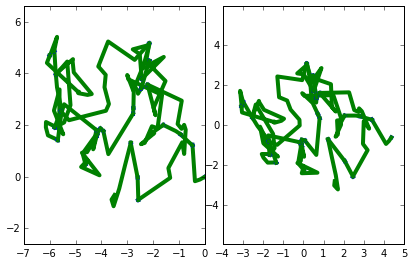

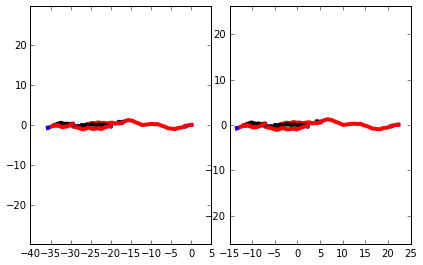

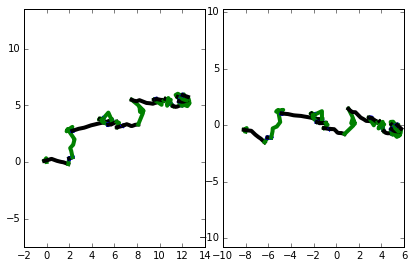

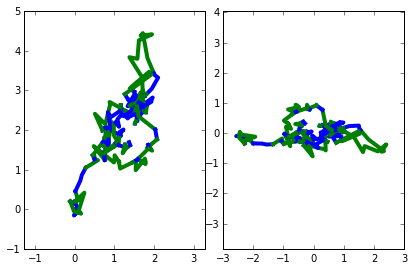

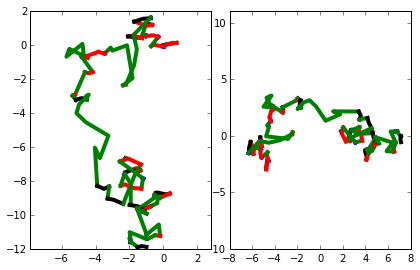

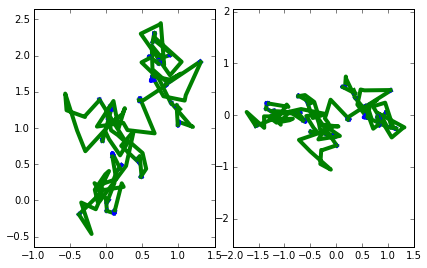

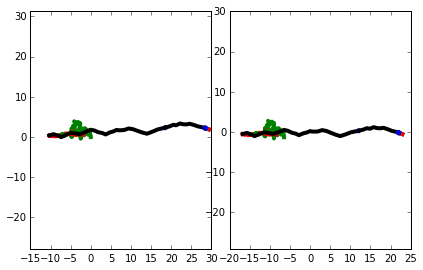

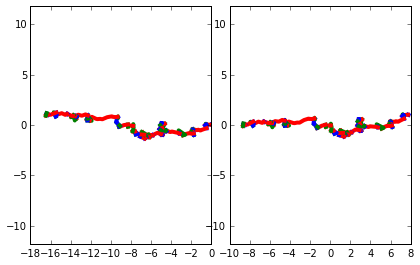

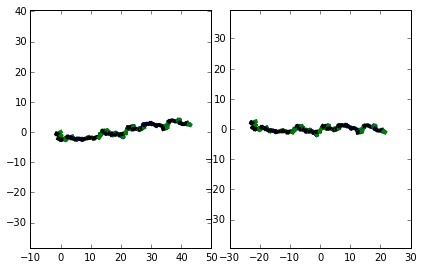

In [111]:
l = 200
for i in range(0,20,1):
    #print i
    fig = figure()
    ax = fig.add_subplot(121)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
    init = np.argmax(Y_test[i],axis=-1)
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    axis('equal')
    
    ax = fig.add_subplot(122)
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][2][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    axis('equal')

KeyboardInterrupt: 

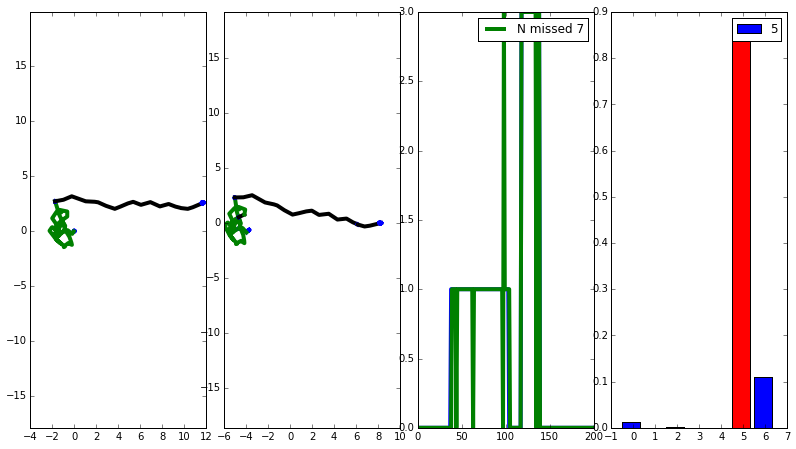

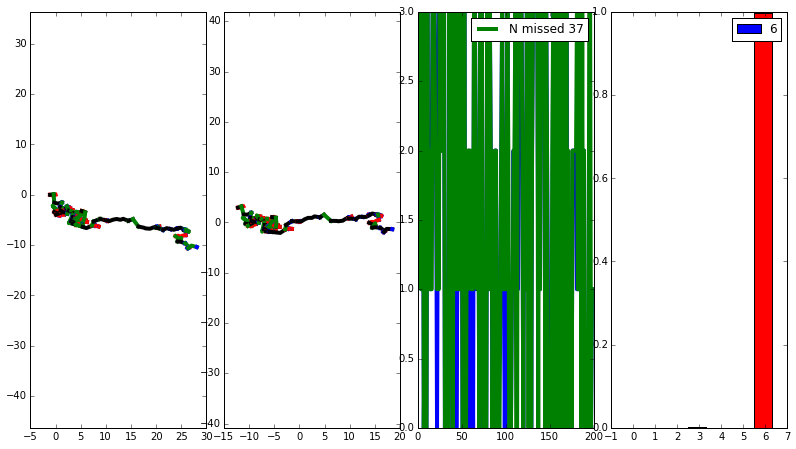

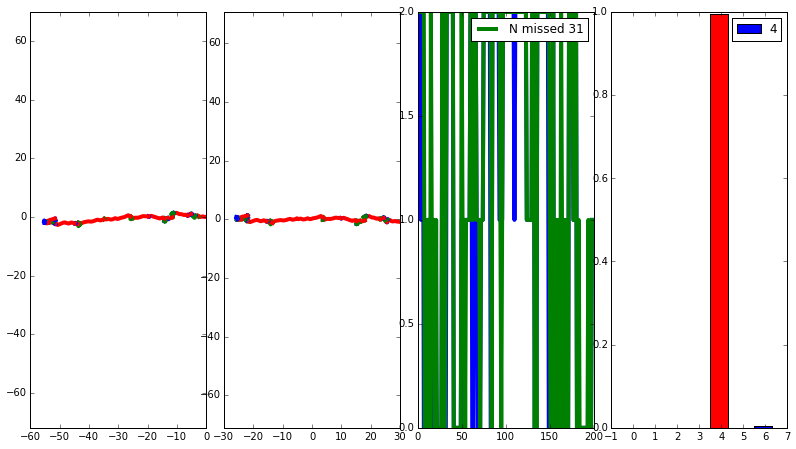

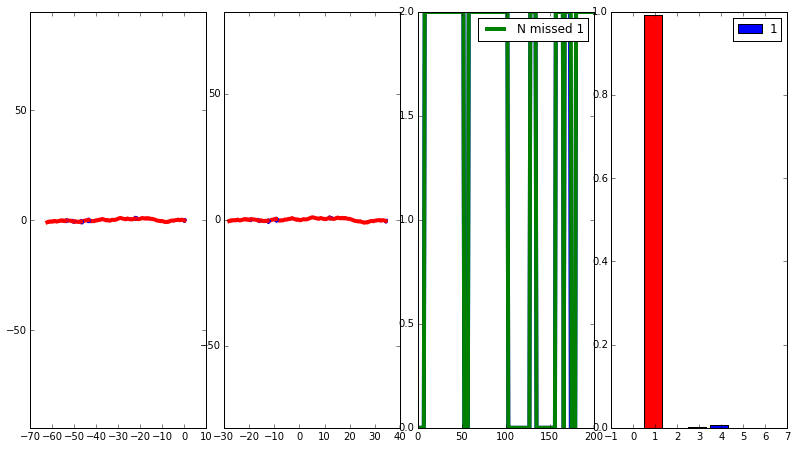

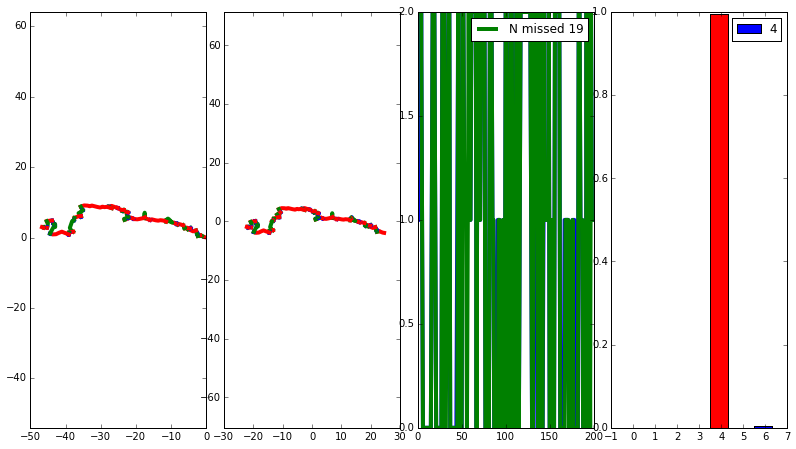

In [62]:
#print score.shape
l = 199
for i in range(0,20,1):
    
    init = np.argmax(Y_test[i],axis=-1)

    proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi = np.argmax(proba,axis=-1)
    
    gt = np.argmax(Y_test_cat[i,0])
    pcat =  np.argmax(pred_RNN_cat[i])
    #if gt == pcat:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 40:
    #    continue
    fig = figure(figsize=(15,7))
    
    ax = fig.add_subplot(151)
 
  
    plot_label(X_traj_test[i][1][:l],init[:l])
    axis('equal')
    
    
    
    
    ax = fig.add_subplot(152)
    plot_label(X_traj_test[i][2][:l],classi[:l])
    axis('equal')
    
    ax = fig.add_subplot(153)
    plot( init[:l])
   
    plot(classi[:l],label="N missed %i"%(np.sum(classi[:l] != init[:l])))
    legend()
    
    ax = fig.add_subplot(154)
    #print pred_RNN_cat[i].shape
    bar(np.arange(7)-0.5,pred_RNN_cat[i],label=np.argmax(Y_test_cat[i]))
    gt = np.argmax(Y_test_cat[i,0])
    bar(gt-0.5,pred_RNN_cat[i][gt],color="r")
    legend()

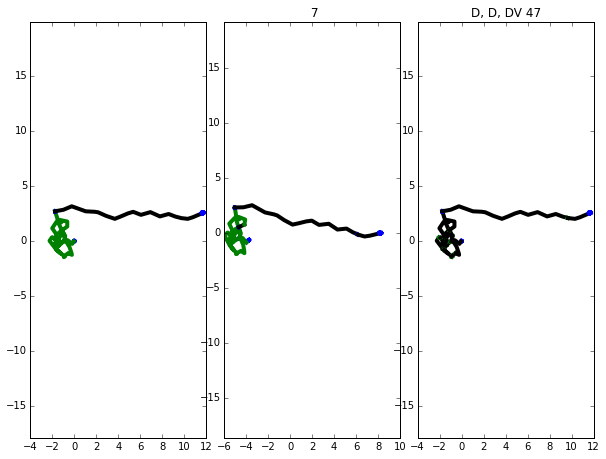

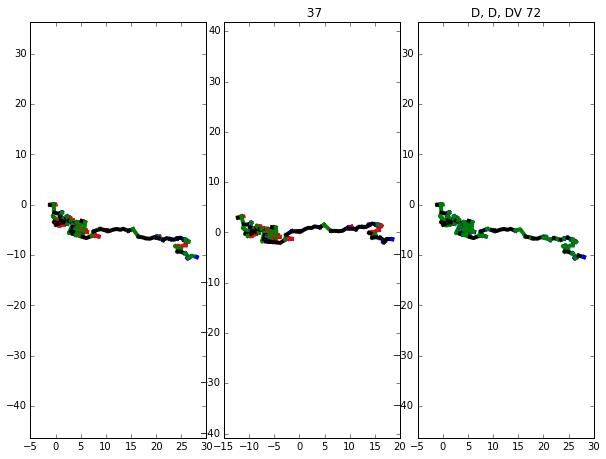

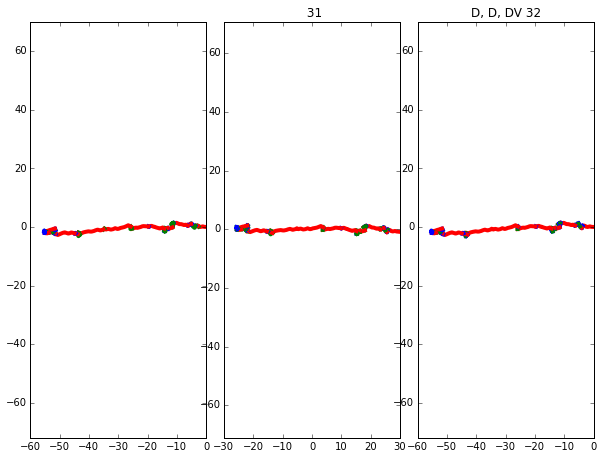

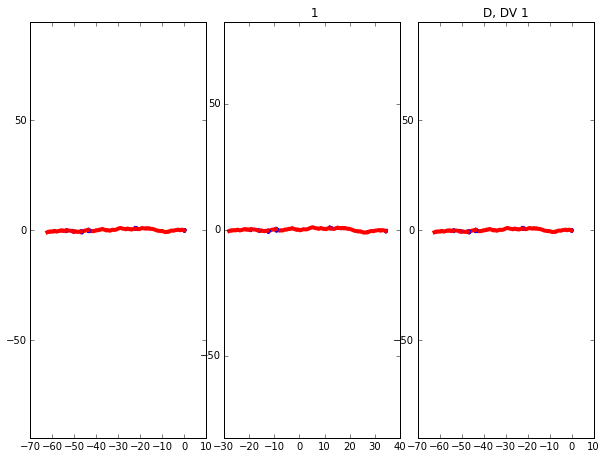

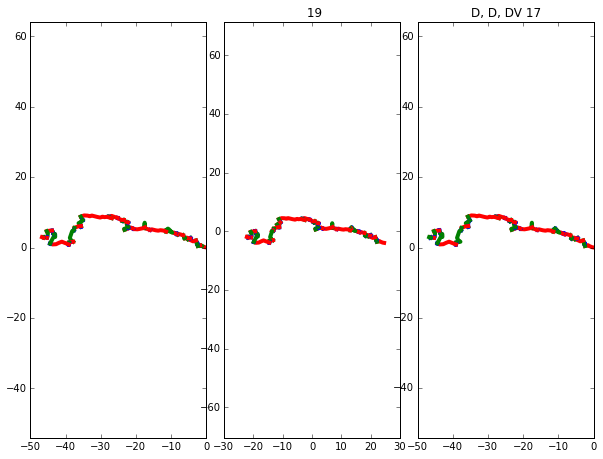

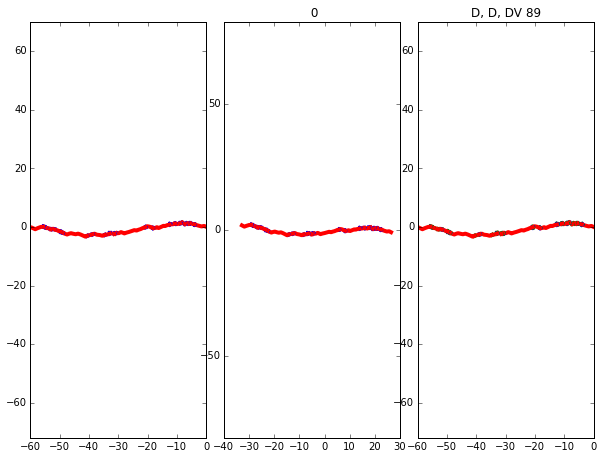

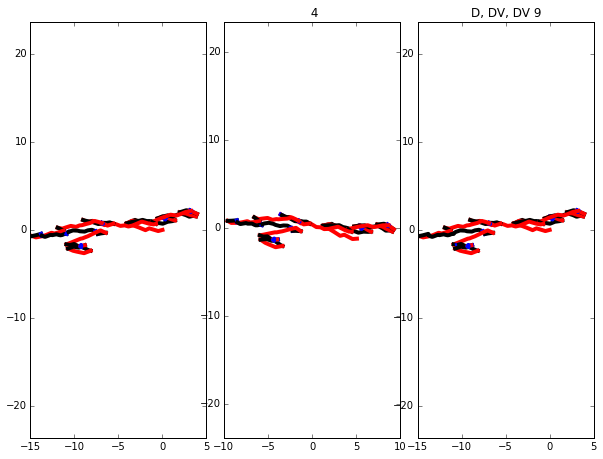

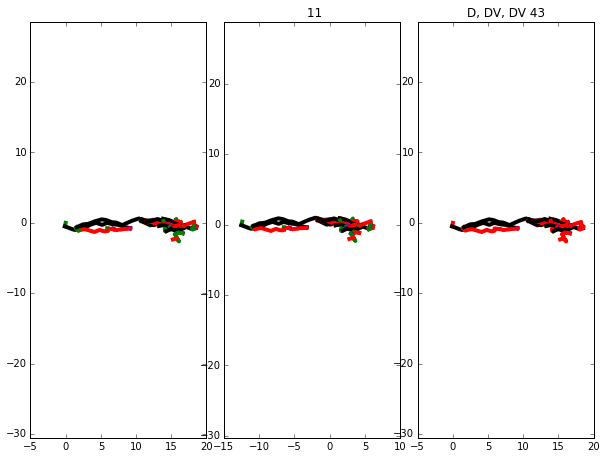

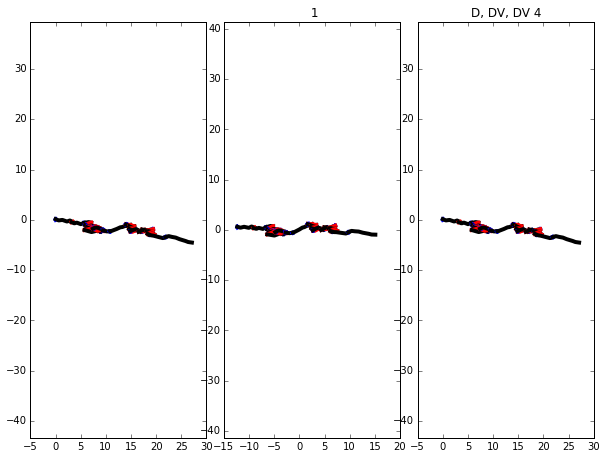

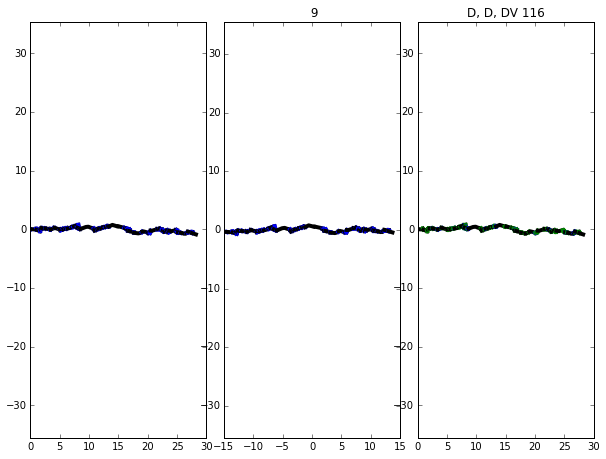

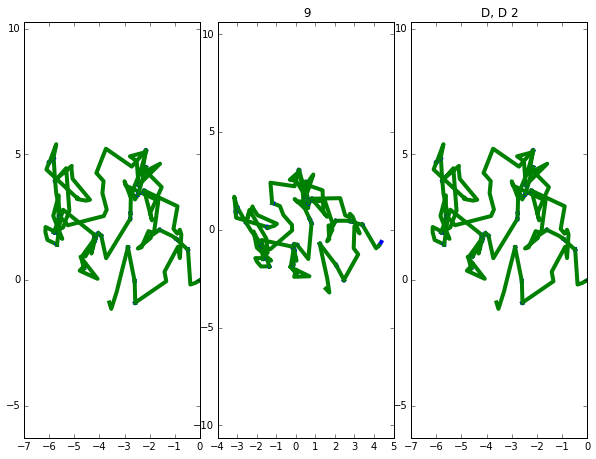

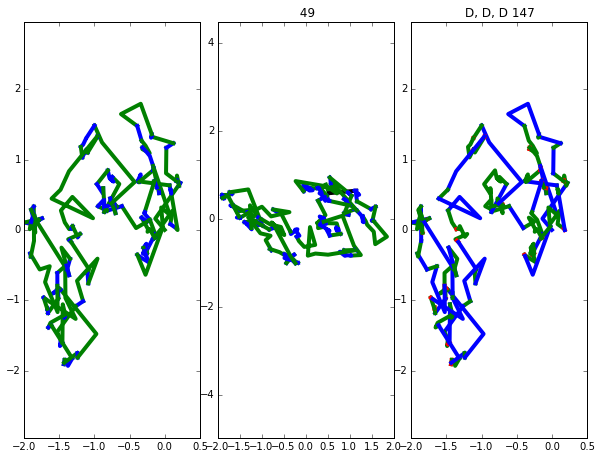

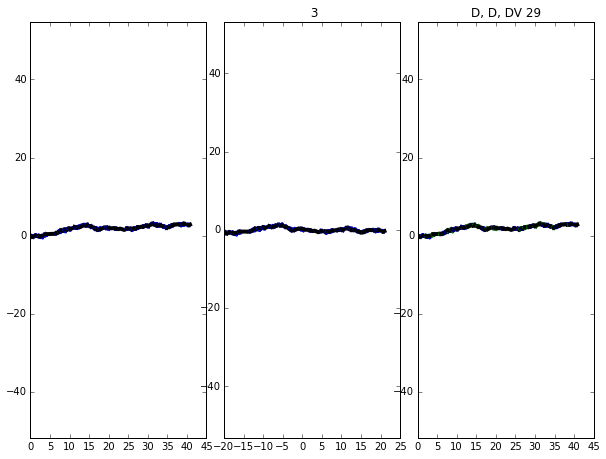

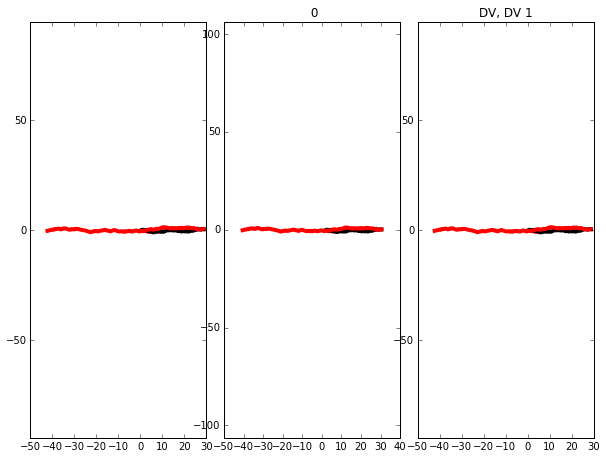

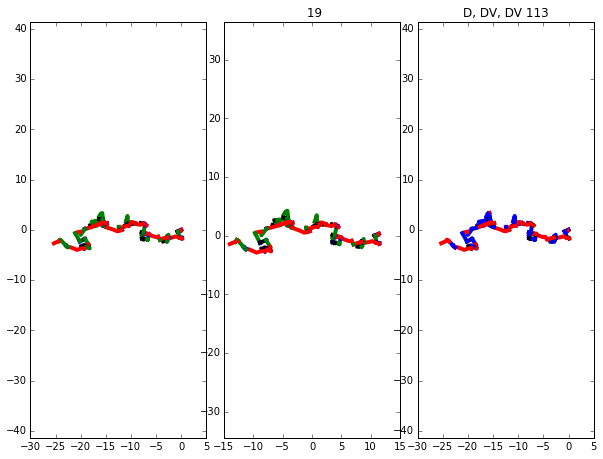

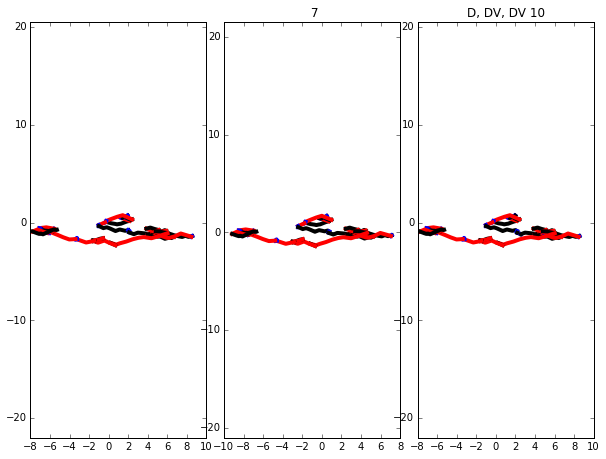

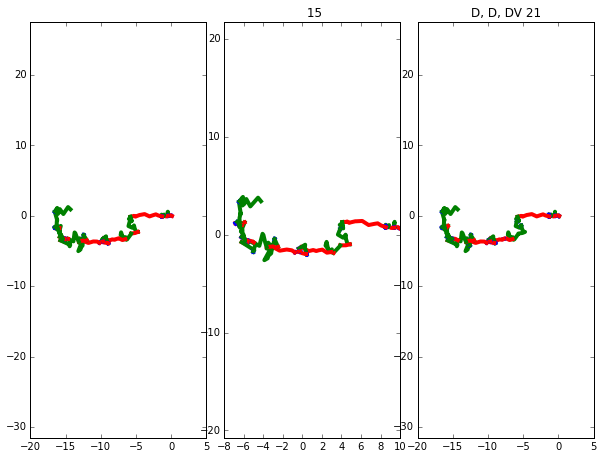

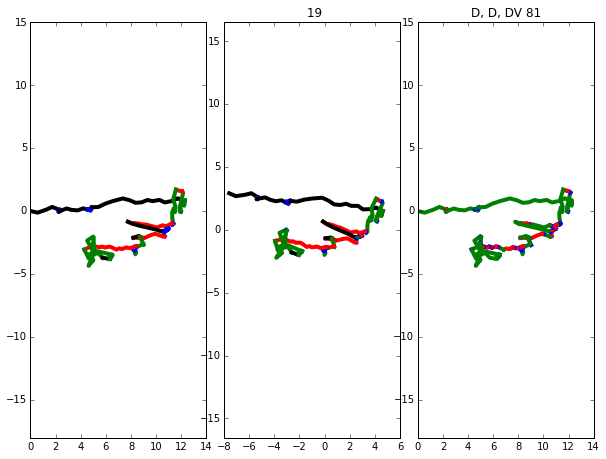

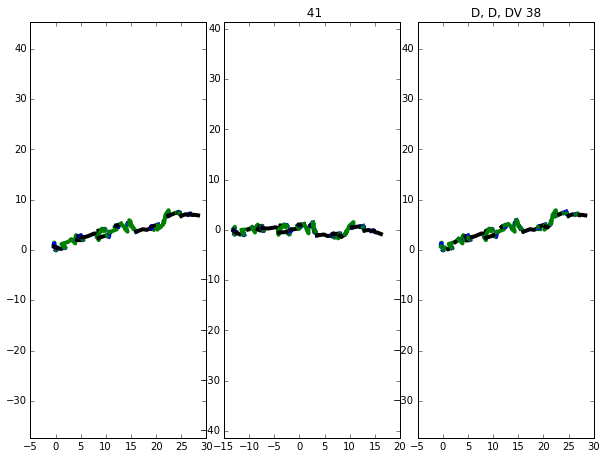

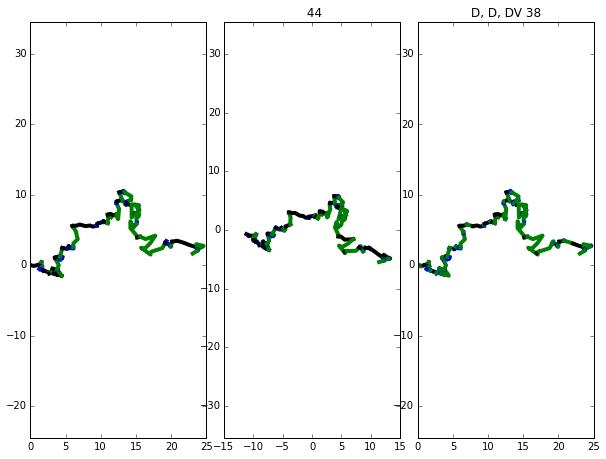

In [72]:

#print score.shape
l = 199
for i in range(0,20,1):
    
    init = np.argmax(Y_test[i],axis=-1)

    proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    classi = np.argmax(proba,axis=-1)
    
    gt = np.argmax(Y_test_cat[i,0])
    pcat =  np.argmax(pred_RNN_cat[i])
    #if gt == pcat:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 40:
    #    continue
    fig = figure(figsize=(15,7))
    
    ax = fig.add_subplot(151)
 
  
    plot_label(X_traj_test[i][1][:l],init[:l])
    axis('equal')
    
    
    ax = fig.add_subplot(152)
    plot_label(X_traj_test[i][2][:l],classi[:l])
    title(" %i"%(np.sum(classi[:l] != init[:l])))

    axis('equal')
    
    ax = fig.add_subplot(153)
    classes,steps,labels= get_step_class("/home/jarbona/RNN_mus/res%i"%i)
    #print labels
    #print len(steps),len(init)
    
    plot_label(X_traj_test[i][1][:l],steps[:l])
    title(labels+" %i"%(np.sum(steps[:l] != init[:l])))
    axis('equal')


In [47]:

score = graph.evaluate({"input1":X_train[:100,::,newaxis], "output":Y_train[:100]}, batch_size=16)
print score
pred0 =graph.predict({"input1":X_train[:100,::,newaxis]},  batch_size=16)
pred = pred0["output"]
#print pred[0] # / np.sum(pred[0],axis=1)[::,newaxis]

0.913520669937


()


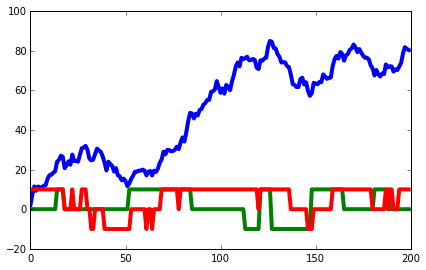

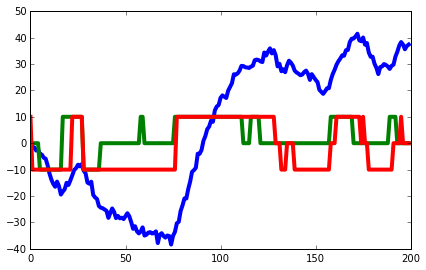

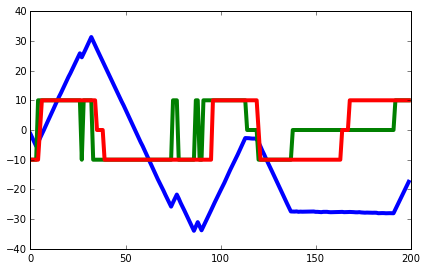

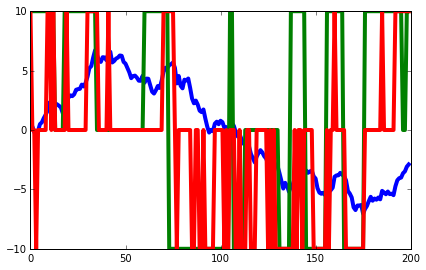

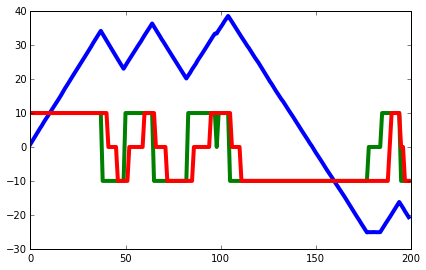

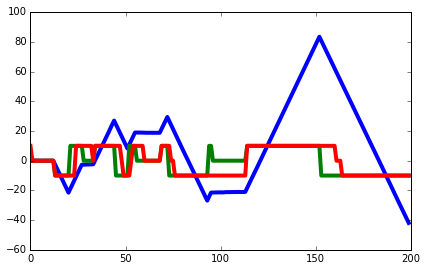

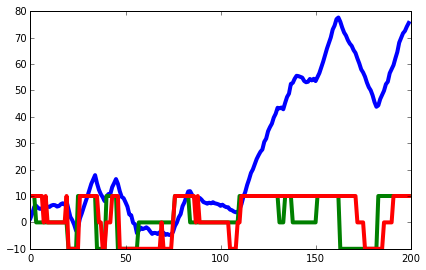

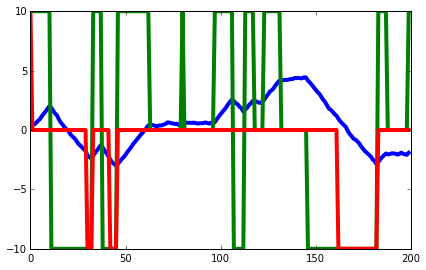

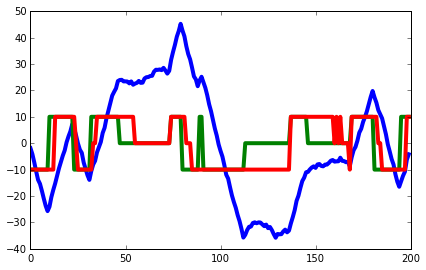

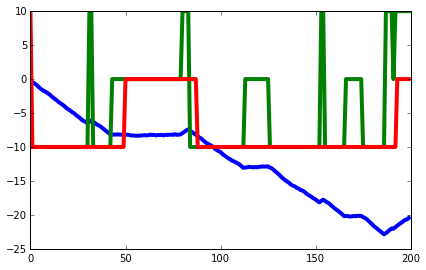

In [48]:
print score.shape
for i in range(10):
    figure()

    plot(X_train[i])
    plot( 10*(np.argmax(Y_train[i],axis=-1)-1))
    proba = pred[i] / np.sum(pred[i],axis=1)[::,newaxis]
    plot(10*(np.argmax(proba,axis=-1)-1))

In [584]:
y = np.argmax(Y_train[:10],axis=-1)
print y.shape

(10, 200)


In [17]:
from sklearn.svm import SVC
X_train = np.array(X_train)
Y_train = np.array(Y_train)
xs = X_train.shape
print xs
length = 300
X = X_train[:length].reshape(length*xs[1],xs[2])
y =  np.argmax(Y_train[:length],axis=-1).flatten()[::,newaxis]
print X.shape,y.shape
#clf = SVC()
clf = SVC(degree=3)
clf.fit(X, y) 


/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._min_spanning_tree import minimum_spanning_tree
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/_graph_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._graph_tools import csgraph_to_dense, csgraph_from_dense,\
/usr/lib/python2.7/dist-packages/sklearn/utils/sparsetools/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._traversal import connected_components
/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:20: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._logistic_sigmoid import _log_logistic_sigmoid
/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .sparsefuncs_fast impor

(40000, 200, 2)
(60000, 2) (60000, 1)


/usr/lib/python2.7/dist-packages/sklearn/svm/base.py:441: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
length=100
xs = X_test.shape
X = X_test[:length].reshape(length*xs[1],xs[2])
y =  np.argmax(Y_test[:length],axis=-1).flatten()
print clf.score(X,y)
pred = clf.predict(X).reshape(length,200)

AttributeError: 'function' object has no attribute 'score'

In [41]:
print X_test.shape
random_sin=np.random.randint(0,2,200)
traj = plot_traj(X_test[0],plot=False,random_sin=random_sin)

(100, 200, 2)


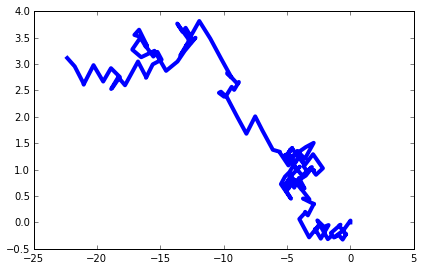

In [50]:
plot(traj[::,0],traj[::,1])
from scipy.io import savemat
D={}
D["track_fig1"] = traj[:20,:2]
D["cfg_fig1"] = {"test":1}

savemat("test.mat",D)